In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')


train_df.shape

(800, 22)

In [ ]:
train_df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
train_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
# Using info() to find the non null rows and data type across columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
# Function to extract the categorical columns and numerical columns in separate list for ease of EDA
def get_num_cat_cols(df):

    num_cls = [x for x in df.columns if df[x].dtype != 'object']
    cat_cls = [x for x in df.columns if x not in num_cls]

    print(f'Numerical columns \n',num_cls)
    print(f'Categorical columns \n',cat_cls)

    return num_cls, cat_cls

In [ ]:
num_cols, cat_cols = get_num_cat_cols(train_df)

Numerical columns 
 ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']
Categorical columns 
 ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']


In [ ]:
# Descriptive statistics for numerical columns
train_df[num_cols].describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


**Inference**
1. Columns - A1_Score to A10_Score has value either 0 or 1, to be considered as binary variable
2. Age starts from min 2 yrs to max 89 yrs with median value in 24.8 yrs and average value in 28.45 yrs
3. Result value ranges from -6.13 to +15.85
4. Target column indicates there is 20% have Autism and 80% dont have autism

In [ ]:
# Find the unique values with counts in categorical variables, and check for special characters to do cleaning
for c in cat_cols:
    print('-'*100)
    print(f'Column Name - {c}')
    print('-'*100)
    print(train_df[c].value_counts())

----------------------------------------------------------------------------------------------------
Column Name - gender
----------------------------------------------------------------------------------------------------
gender
m    530
f    270
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - ethnicity
----------------------------------------------------------------------------------------------------
ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - jaundice
----------------------------------------------------------------

For columns **relation,ethinicity** we have special character **'?'**, which we will replace with **others**

In [ ]:
train_df['relation'] = train_df['relation'].replace('?','Others')
train_df['ethnicity'] = train_df['ethnicity'].replace('?','others')

Column - **age_desc** contains single value across all rows, so it is good to drop this column

In [ ]:
train_df.drop('age_desc',axis=1,inplace=True)

In [ ]:
# Recreating the numerical and categorical columns list
num_cols, cat_cols = get_num_cat_cols(train_df)

Numerical columns 
 ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']
Categorical columns 
 ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']


The values in column with Score is either 0 or 1, so it has to be considered as nominal categorical variable. Adding these columns to cat_cols list

In [ ]:
# Moving the binary variables in numerical columns to categorical columns list, for EDA
cat_cols = cat_cols + [x for x in num_cols if '_Score' in x]
print(cat_cols)
num_cols = [x for x in num_cols if x not in cat_cols]
print(num_cols)

['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
['ID', 'age', 'result', 'Class/ASD']


# EDA

We have 2 only numerical columns - **age, result**

<Axes: xlabel='Class/ASD', ylabel='age'>

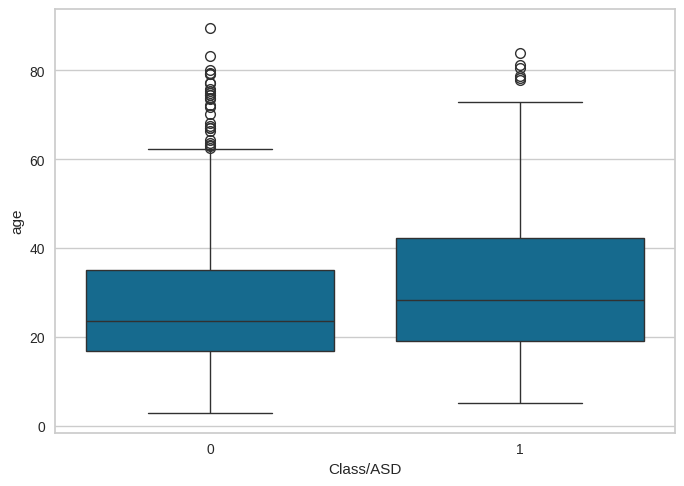

In [ ]:
# Feature - age
sns.boxplot(x = train_df['Class/ASD'], y = train_df['age'])

**Inference**
1. Median Age of persons having autism is more than who dont have
2. Range for both values of target class is same, thus age cannot be good classifier of target classm below histogram indicates the same

<Axes: xlabel='age', ylabel='Count'>

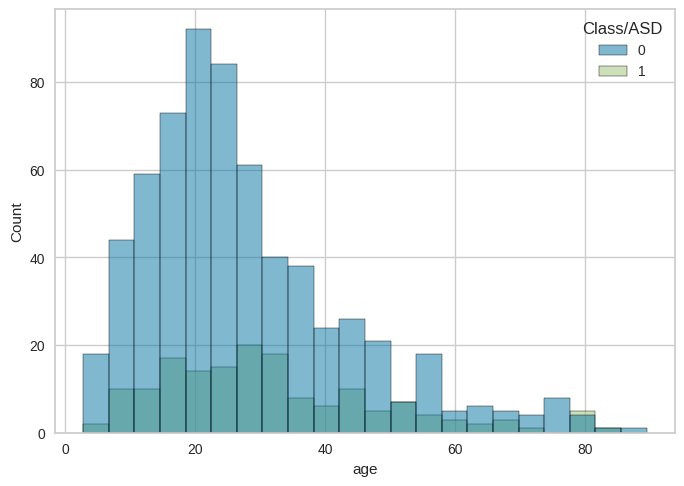

In [ ]:
sns.histplot(x = train_df['age'], hue = train_df['Class/ASD'])

<Axes: xlabel='Class/ASD', ylabel='result'>

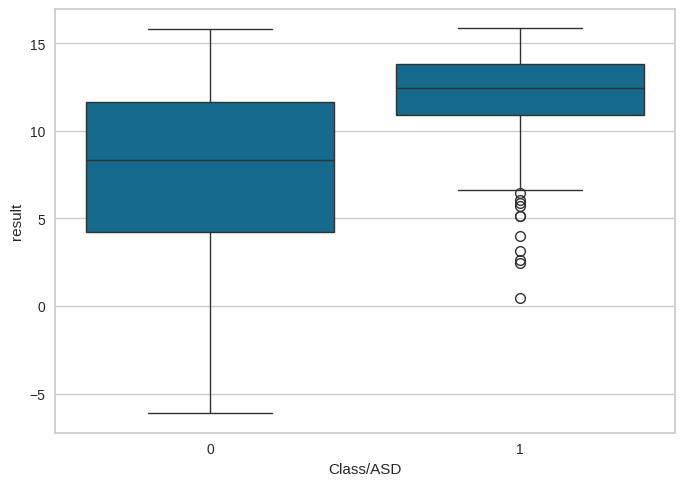

In [ ]:
# Feature - result
sns.boxplot(x = train_df['Class/ASD'], y = train_df['result'])

**Inference**
1. Median result of persons having autism is more than who dont have
2. Range of result data for person having autism is shorter and higher when compared to person not having autism, this is could be potential classifier of target class

<Axes: xlabel='result', ylabel='Count'>

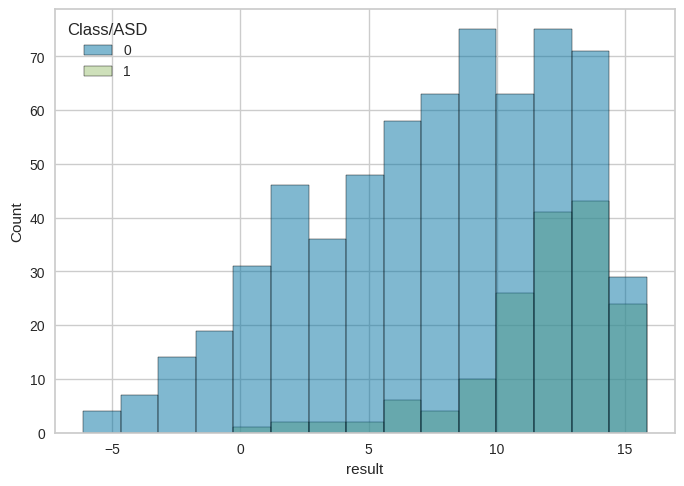

In [ ]:
sns.histplot(x = train_df['result'], hue = train_df['Class/ASD'])

In [ ]:
# Function to conduct chi square test between categorical feature and target feature
def chi_sq_test(ct):
    # input crosstab of 2 categorical variables
    stat, p, dof, expected = chi2_contingency(ct)

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Both variables are Dependent (reject H0)')
    else:
        print('Both variables are Independent (H0 holds true)')

In [ ]:
# Function to plot stacked bar graph between categorical feature and target variable,
# also helps us know the dependent variable using chisquare function - this step is feature selection
def cat_col_test(df, cat_colname, target_colname):

    print(f"Column name - {cat_colname}")
    ct = pd.crosstab(df[cat_colname],df[target_colname])
    chi_sq_test(ct)
    ax = ct.plot(kind='bar',stacked=True, rot = 45)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    plt.show()

Column name - gender
p value is 0.9758243168741388
Both variables are Independent (H0 holds true)


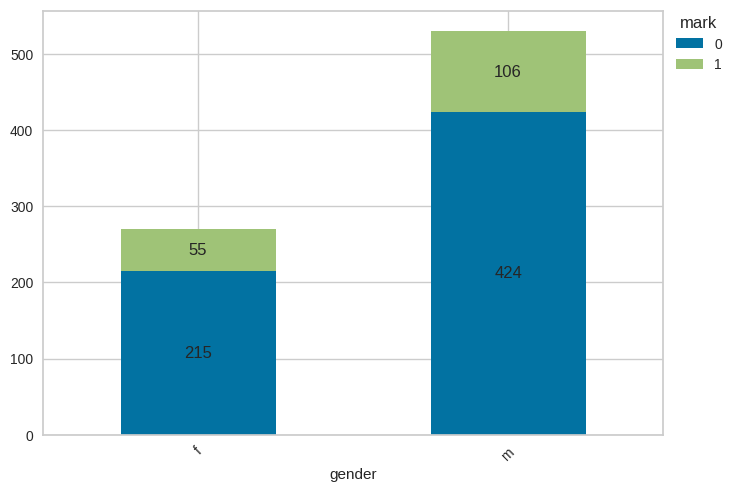

Column name - ethnicity
p value is 1.4561482608094145e-33
Both variables are Dependent (reject H0)


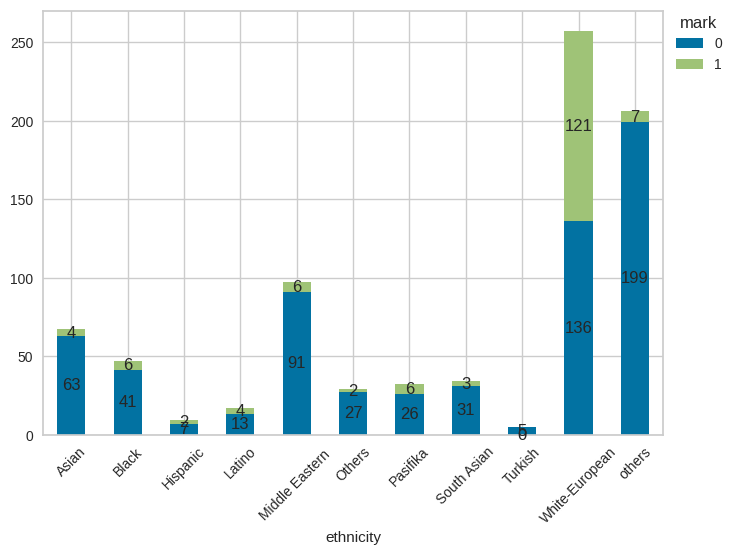

Column name - jaundice
p value is 0.00013300658957470307
Both variables are Dependent (reject H0)


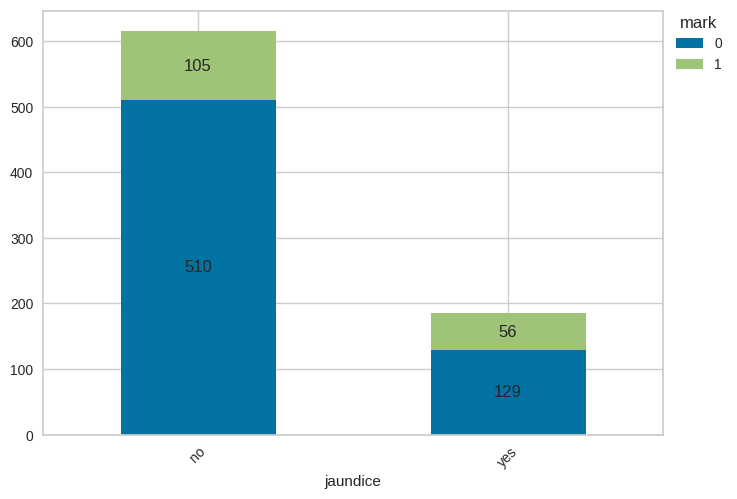

Column name - austim
p value is 1.0060560058593027e-23
Both variables are Dependent (reject H0)


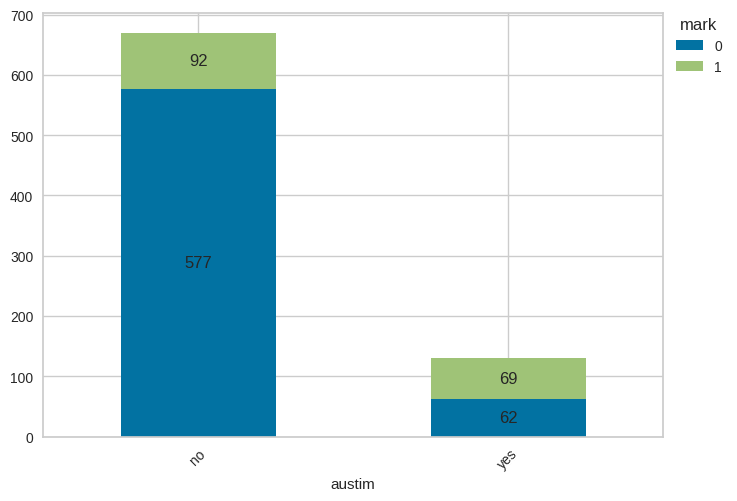

Column name - contry_of_res
p value is 2.8611111937550227e-19
Both variables are Dependent (reject H0)


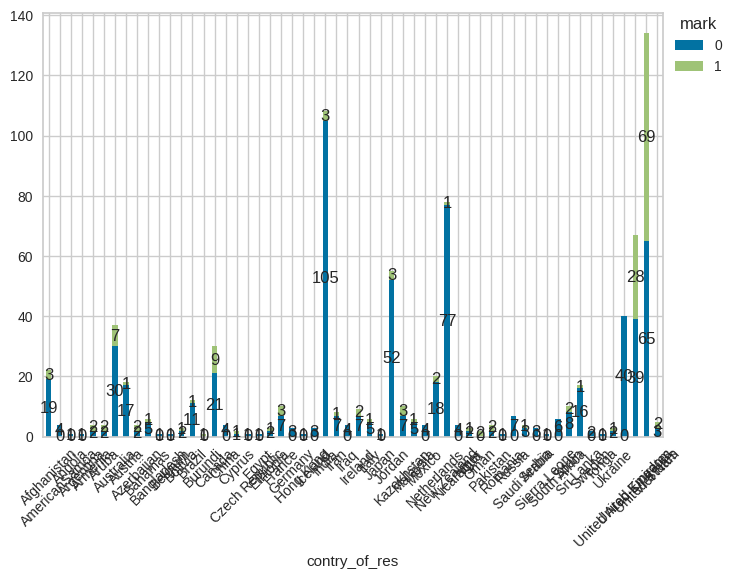

Column name - used_app_before
p value is 0.3745543476430917
Both variables are Independent (H0 holds true)


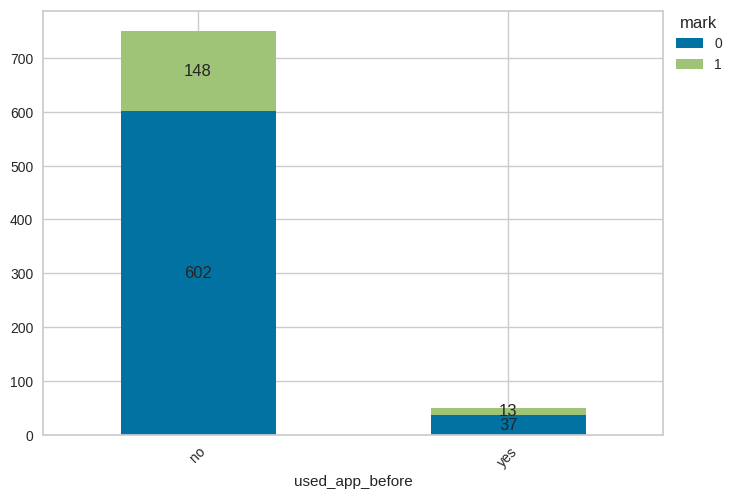

Column name - relation
p value is 0.03206590795264572
Both variables are Dependent (reject H0)


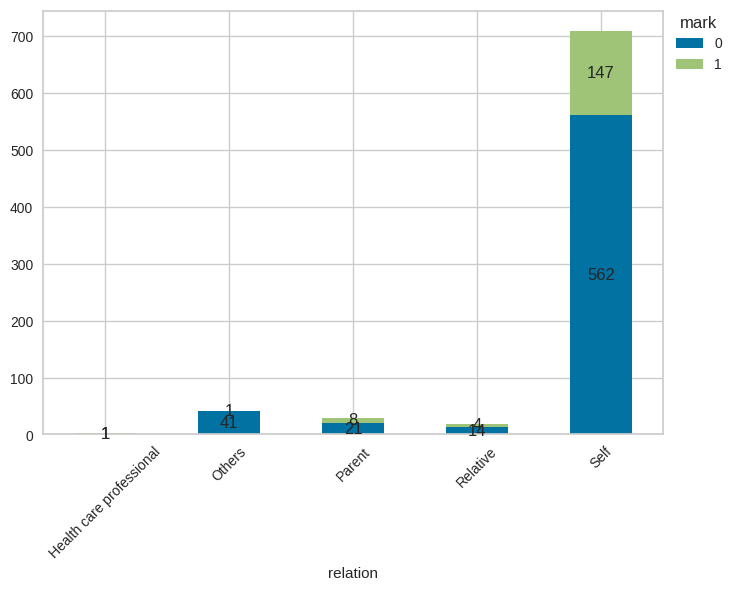

Column name - A1_Score
p value is 4.104487536920418e-17
Both variables are Dependent (reject H0)


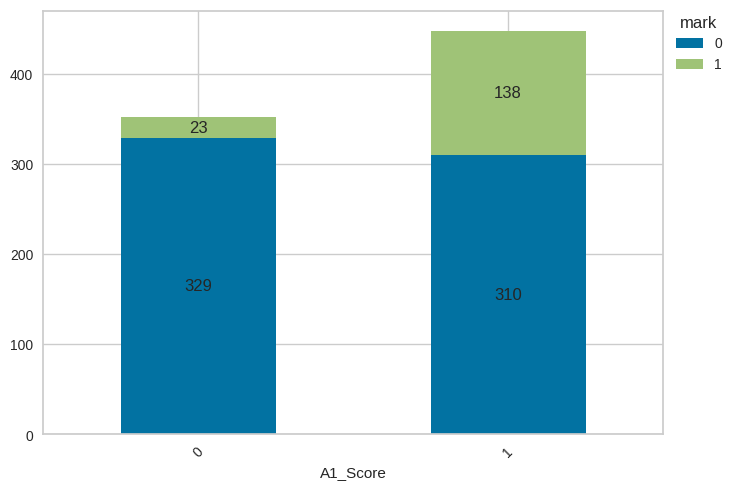

Column name - A2_Score
p value is 1.3998012922364413e-25
Both variables are Dependent (reject H0)


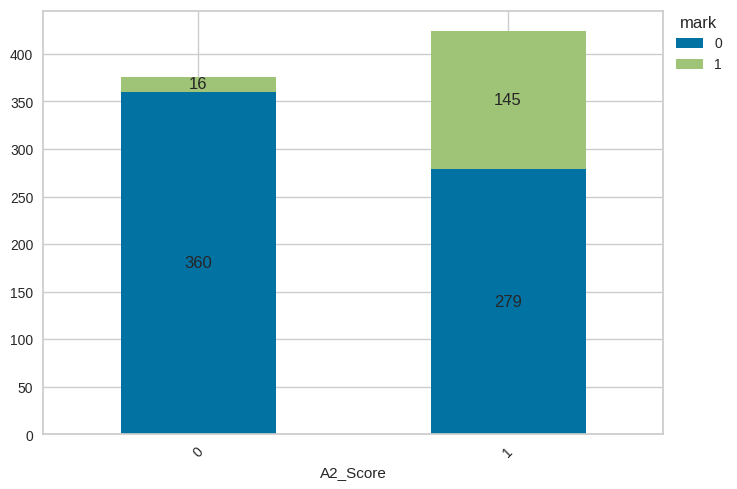

Column name - A3_Score
p value is 2.4007562062687566e-38
Both variables are Dependent (reject H0)


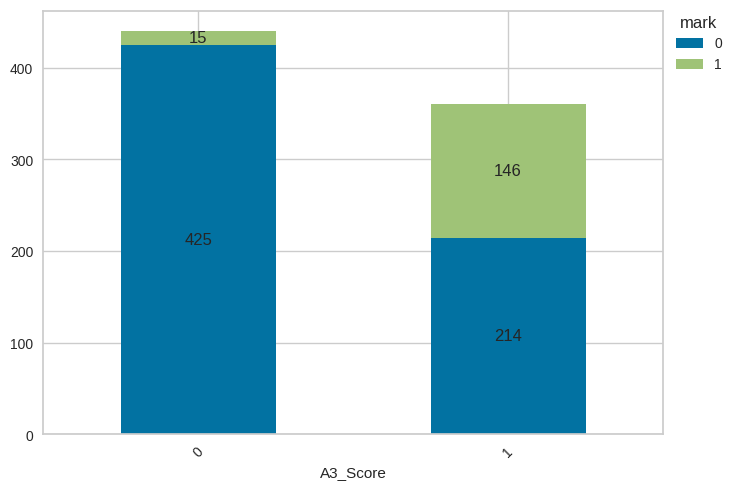

Column name - A4_Score
p value is 4.8840206399536454e-45
Both variables are Dependent (reject H0)


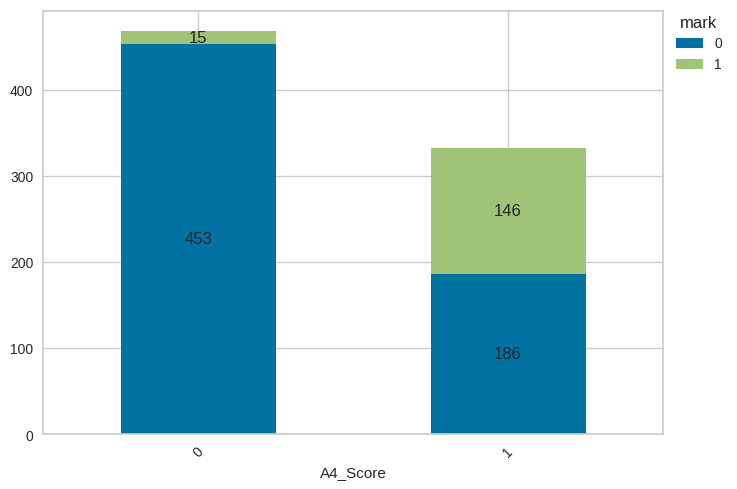

Column name - A5_Score
p value is 1.7931000962761736e-38
Both variables are Dependent (reject H0)


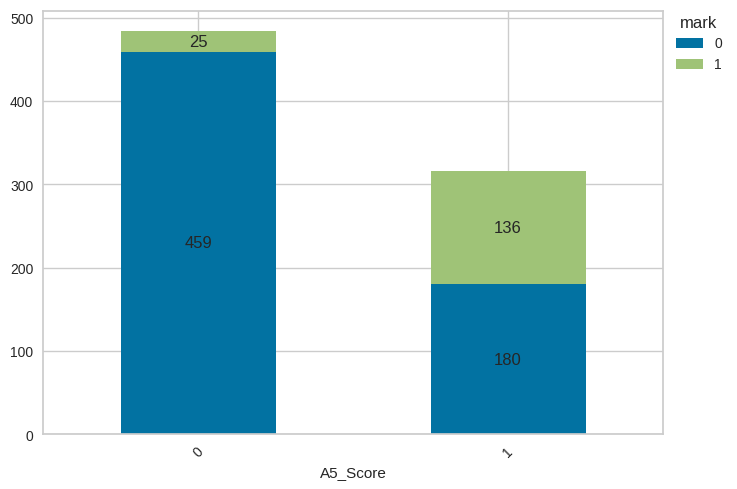

Column name - A6_Score
p value is 1.3536803601031668e-52
Both variables are Dependent (reject H0)


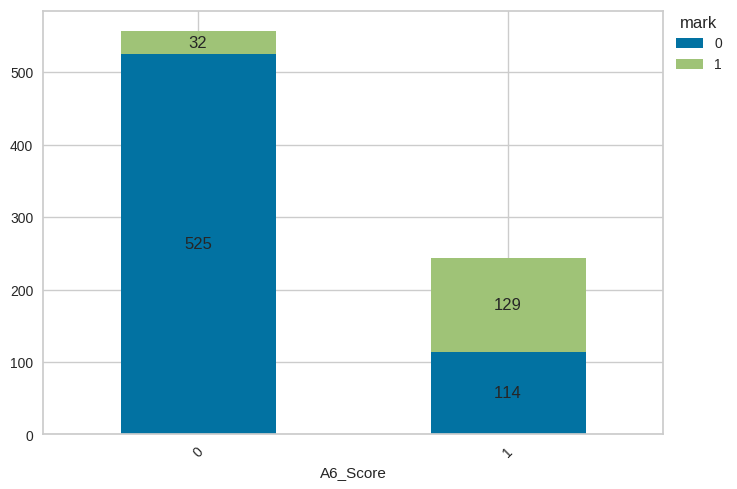

Column name - A7_Score
p value is 5.621312869749746e-37
Both variables are Dependent (reject H0)


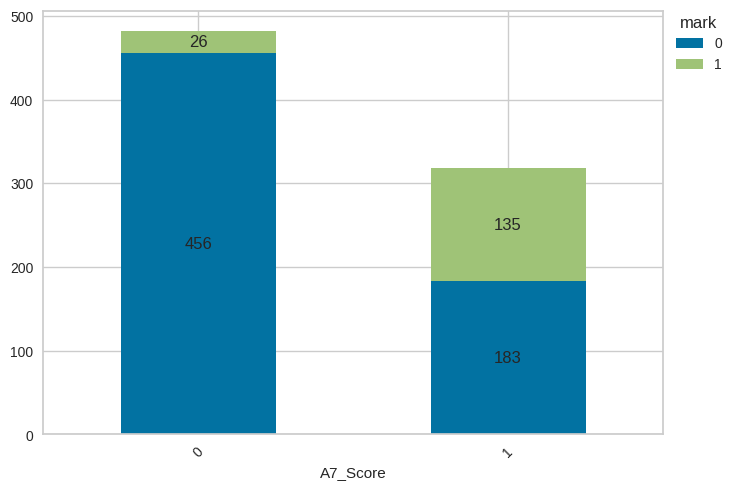

Column name - A8_Score
p value is 2.181610421234002e-18
Both variables are Dependent (reject H0)


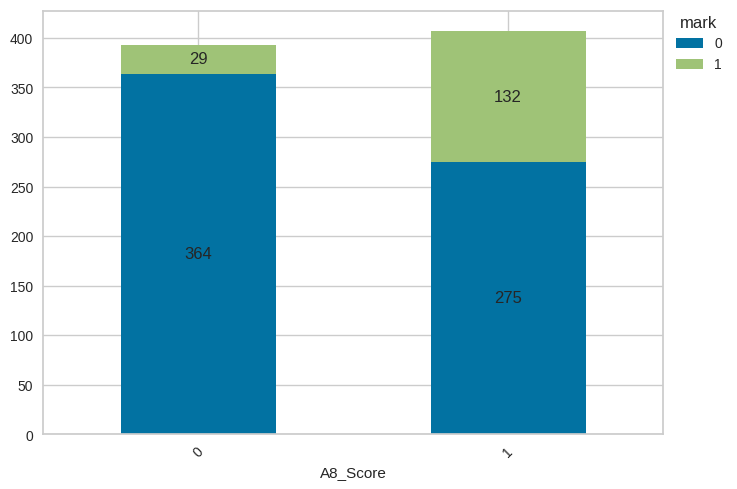

Column name - A9_Score
p value is 9.762852300543611e-39
Both variables are Dependent (reject H0)


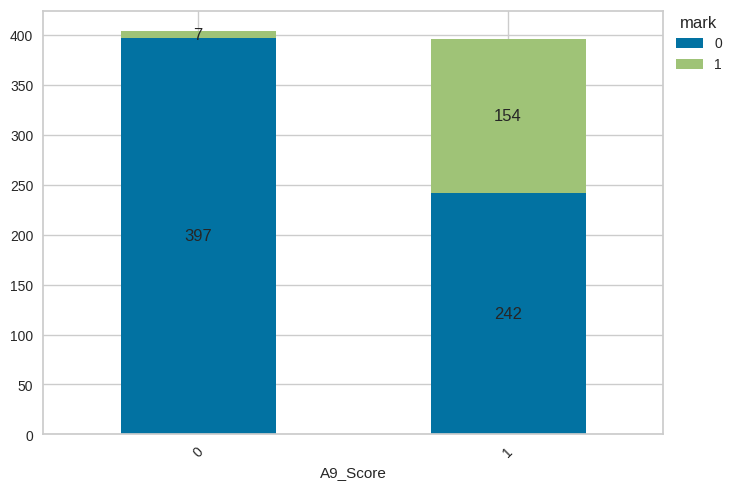

Column name - A10_Score
p value is 5.880205552224773e-22
Both variables are Dependent (reject H0)


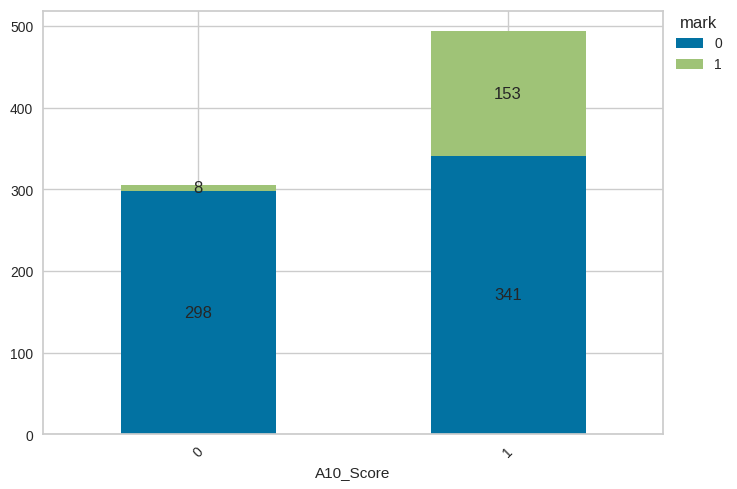

In [ ]:
for c in cat_cols:
    cat_col_test(train_df, c, 'Class/ASD')

**Inference**

1. **used_app_before, gender** are independent from target variable, in chisquare test. Hence, dropping these variable for model building stage.

In [ ]:
train_df.drop(['used_app_before','gender'],axis=1,inplace=True)


In [ ]:
train_df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'result',
       'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
# assigning yes=1, no-0
train_df['jaundice'] = np.where(train_df['jaundice'] == 'yes',1,0)
train_df['austim'] = np.where(train_df['austim'] == 'yes',1,0)


In [ ]:
# Label encoding based on frequency values of categorical variable
dict_ethnicity = dict(zip(train_df['ethnicity'].value_counts().index, range(1,train_df['ethnicity'].nunique()+1)))
dict_ethnicity

{'White-European': 1,
 'others': 2,
 'Middle Eastern ': 3,
 'Asian': 4,
 'Black': 5,
 'South Asian': 6,
 'Pasifika': 7,
 'Others': 8,
 'Latino': 9,
 'Hispanic': 10,
 'Turkish': 11}

In [ ]:
train_df['ethnicity'] = train_df['ethnicity'].map(dict_ethnicity)

In [ ]:
col_name = 'contry_of_res'
dict_country = dict(zip(train_df[col_name].value_counts().index, range(1,train_df[col_name].nunique()+1)))
train_df[col_name] = train_df[col_name].map(dict_country)


In [ ]:
col_name = 'relation'
dict_relation = dict(zip(train_df[col_name].value_counts().index, range(1,train_df[col_name].nunique()+1)))
train_df[col_name] = train_df[col_name].map(dict_relation)


In [ ]:
train_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jaundice,austim,contry_of_res,result,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,2,0,0,11,6.351166,1,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,2,0,0,2,2.255185,1,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,1,0,1,1,14.851484,1,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,2,0,0,1,2.276617,1,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,2,0,0,20,-4.777286,1,0


In [ ]:
train_df.isnull().sum()

ID               0
A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
ethnicity        0
jaundice         0
austim           0
contry_of_res    0
result           0
relation         0
Class/ASD        0
dtype: int64

# Model building - finding best algorithm

In [ ]:
X = train_df.drop(['ID','Class/ASD'],axis=1)
y = train_df['Class/ASD']

X.shape, y.shape

((800, 17), (800,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
ML_Model = []
acc_train = []
acc_test = []
acc_precision = []
acc_recall = []
acc_f1 = []
acc_roc = []

#function to call for storing the results
def storeResultsall(model,a,b,c,d,e,f):
  ML_Model.append(model)
  acc_train.append(round(a,4))
  acc_test.append(round(b, 4))
  acc_precision.append(round(c, 4))
  acc_recall.append(round(d, 4))
  acc_f1.append(round(e, 4))
  acc_roc.append(round(f, 4))

Training Accuracy: 0.8734375
Testing Accuracy: 0.85
Best parameters found: {'C': 0.3, 'penalty': 'l1', 'solver': 'liblinear'}


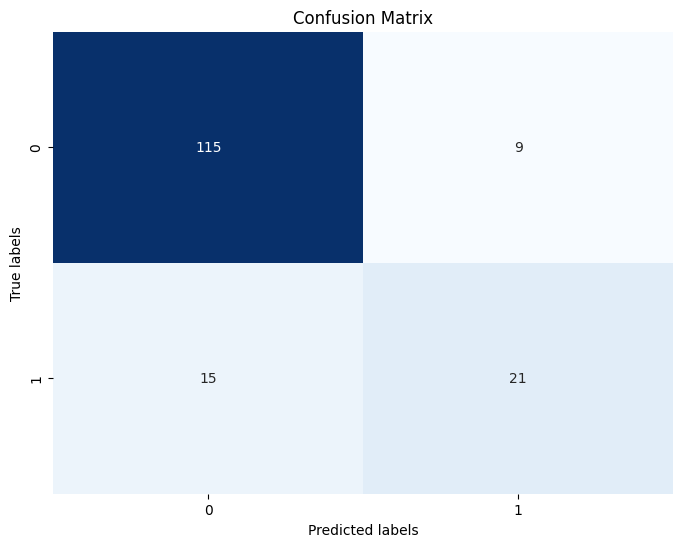

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the logistic regression model
log_reg = LogisticRegression()

# Define the parameter grid to search
param_grid = {
    'C':  [0.001, 0.01, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'penalty': ['l1', 'l2'],  # Penalty norm
     'solver': ['liblinear']
}


grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_
train_predictions = best_log_reg.predict(X_train)
test_predictions = best_log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)
train_roc_auc = roc_auc_score(y_train, train_predictions)

# Call the function to store results
storeResultsall("Logistic Regression", train_accuracy, test_accuracy, train_precision, train_recall, train_f1, train_roc_auc)

print("Training Accuracy:", train_accuracy)
# print("Validation Accuracy:", val_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Best parameters found:", grid_search.best_params_)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix for test set
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Training Accuracy: 0.8703125
Testing Accuracy: 0.86875
Best parameters found: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2'}


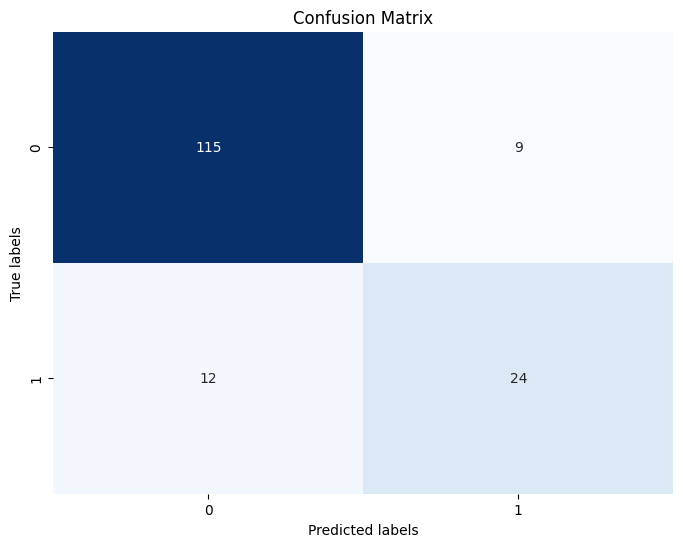

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {
    'max_features': ['auto','sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001,0.2,0.3,0.4,0.5],
    'max_depth' : [1,2,3,5, 6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_decision_tree = grid_search.best_estimator_

# Predictions on the training, validation, and testing sets using the best estimator
train_predictions = best_decision_tree.predict(X_train)
test_predictions = best_decision_tree.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)
train_roc_auc = roc_auc_score(y_train, train_predictions)

# Call the function to store results
storeResultsall("Decision Tree", train_accuracy, test_accuracy, train_precision, train_recall, train_f1, train_roc_auc)

print("Training Accuracy:", train_accuracy)
# print("Validation Accuracy:", val_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Best parameters found:", grid_search.best_params_)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix for test set
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Training Accuracy: 0.83125
Testing Accuracy: 0.825


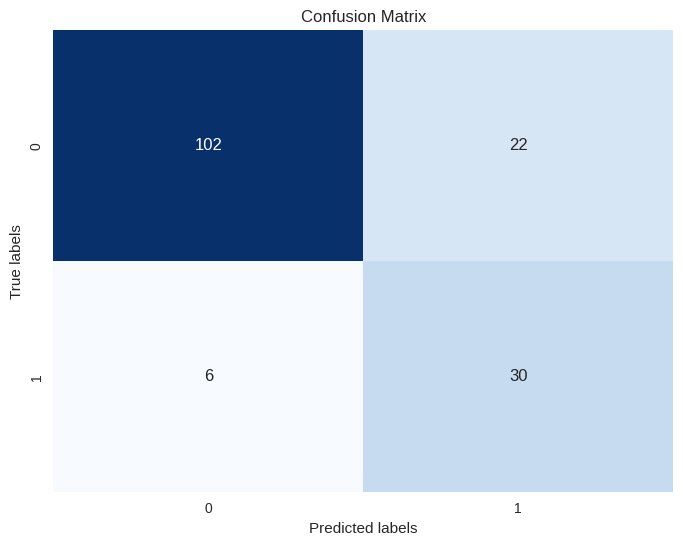

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

# Predictions on the training, validation, and testing sets
train_predictions = nb_classifier.predict(X_train)
test_predictions = nb_classifier.predict(X_test)

# Calculate metrics for training, validation, and testing sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)
train_roc_auc = roc_auc_score(y_train, train_predictions)

# Store results
storeResultsall("Naive Bayes", train_accuracy, test_accuracy, train_precision, train_recall, train_f1, train_roc_auc)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
# Compute confusion matrix for test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Training Accuracy: 0.91875
Testing Accuracy: 0.825
Best parameters found: {'C': 0.5, 'gamma': 0.01, 'kernel': 'poly'}


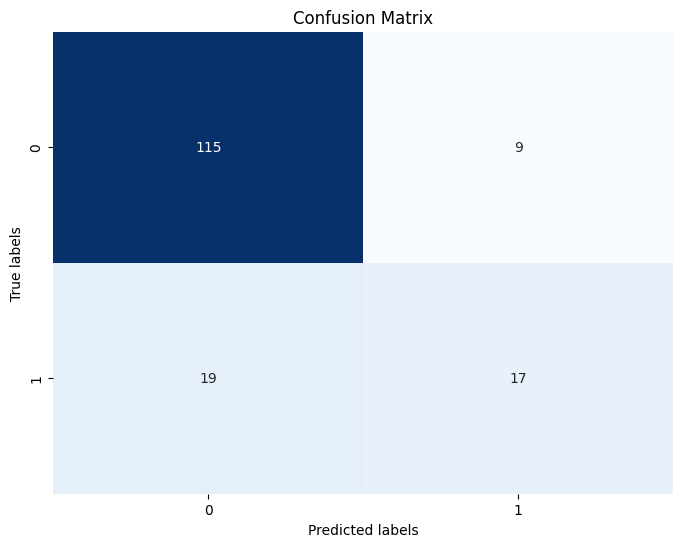

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the SVM classifier
svm_classifier = SVC()

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 0.01, 0.02,0.3,0.4,0.5,0.8,1,10],  # Regularization parameter
     'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': [ 'poly', 'rbf', 'sigmoid'],
}

grid_search = GridSearchCV(svm_classifier, param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_
train_predictions = best_log_reg.predict(X_train)
test_predictions = best_log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)
train_roc_auc = roc_auc_score(y_train, train_predictions)

# Call the function to store results
storeResultsall("SVM", train_accuracy, test_accuracy, train_precision, train_recall, train_f1, train_roc_auc)

print("Training Accuracy:", train_accuracy)
# print("Validation Accuracy:", val_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Best parameters found:", grid_search.best_params_)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix for test set
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
results1 = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy':acc_train,
    'Test Accuracy': acc_test,
    'Precision': acc_precision,
    'Recall' : acc_recall,
    'f1 score': acc_f1,
    'ROC_AUC': acc_roc})

In [ ]:
results1

,ML Model,Train Accuracy,Test Accuracy,Precision,Recall,f1 score,ROC_AUC
0,Logistic Regression,0.8734,0.8500,0.7075,0.600,0.6494,0.7699
1,Decision Tree,0.8703,0.8688,0.6721,0.656,0.6640,0.7892
2,Naive Bayes,0.8312,0.8250,0.5436,0.848,0.6625,0.8376
3,SVM,0.9188,0.8250,0.8349,0.728,0.7778,0.8465


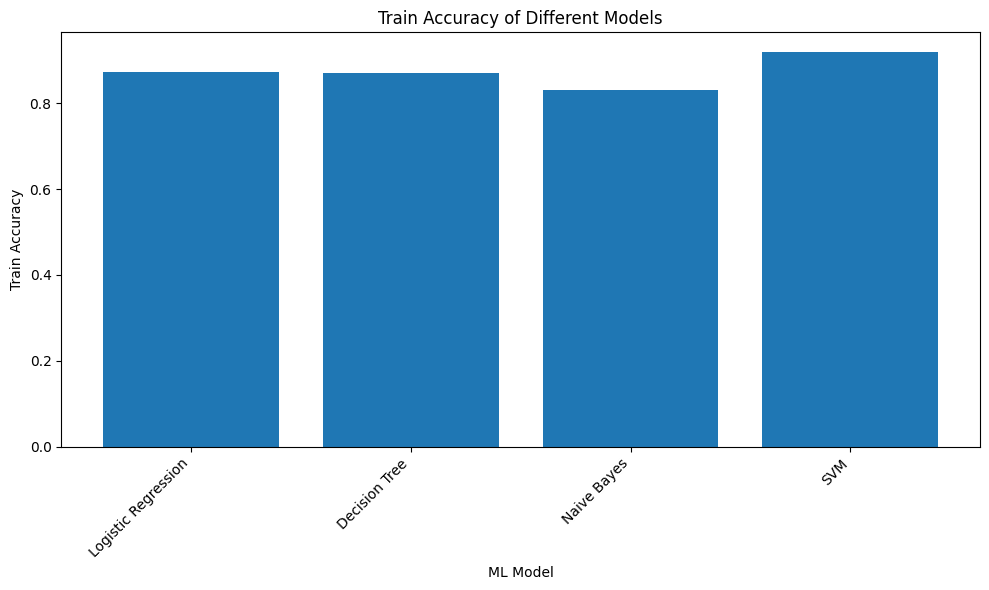

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting train accuracy for all models
plt.figure(figsize=(10, 6))
plt.bar(results1['ML Model'], results1['Train Accuracy'])
plt.xlabel('ML Model')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, learning_curve

Mean: 0.856
Standard Deviation: 0.022
Confidence Interval (95.0%): (0.837, 0.876)


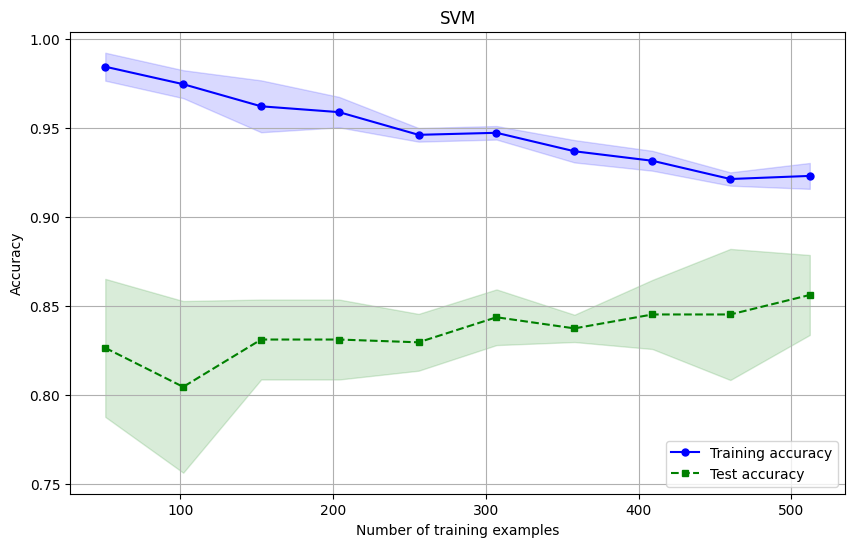

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

params = {'C': 0.5, 'gamma': 0.01, 'kernel': 'poly'}
clf = svm.SVC(**params)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')  # Adjust scoring as needed

# Calculate mean and standard deviation
mean_score = np.mean(cv_scores)
std_score = np.std(cv_scores)

# Calculate confidence interval
num_folds = len(cv_scores)
confidence_level = 0.95  # Adjust as needed
z_score = 1.96  # For a 95% confidence interval
margin_of_error = z_score * (std_score / np.sqrt(num_folds))
lower_bound = mean_score - margin_of_error
upper_bound = mean_score + margin_of_error

print(f"Mean: {mean_score:.3f}")
print(f"Standard Deviation: {std_score:.3f}")
print(f"Confidence Interval ({confidence_level * 100}%): ({lower_bound:.3f}, {upper_bound:.3f})")
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation for training scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Test accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.title('SVM')
plt.show()


Mean: 0.847
Standard Deviation: 0.016
Confidence Interval (95.0%): (0.833, 0.861)


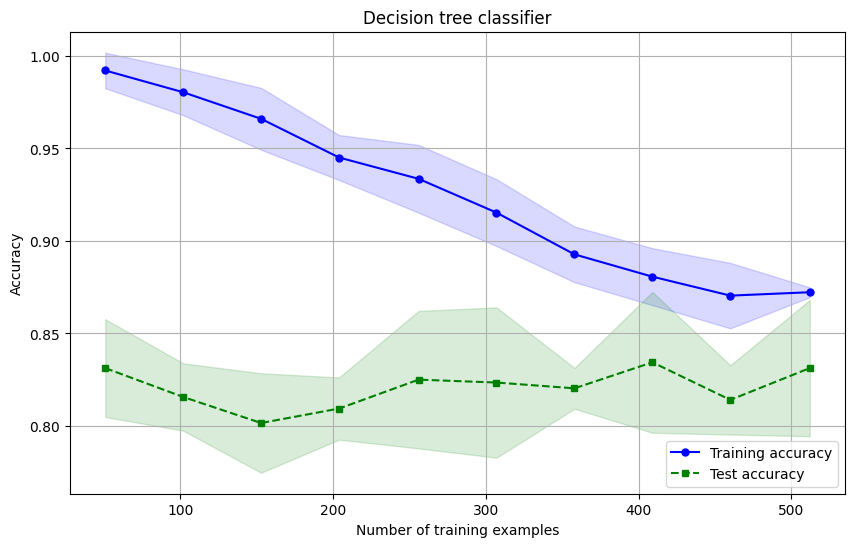

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

params = {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto'}
clf = DecisionTreeClassifier(**params)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')  # Adjust scoring as needed

# Calculate mean and standard deviation
mean_score = np.mean(cv_scores)
std_score = np.std(cv_scores)

# Calculate confidence interval
num_folds = len(cv_scores)
confidence_level = 0.95  # Adjust as needed
z_score = 1.96  # For a 95% confidence interval
margin_of_error = z_score * (std_score / np.sqrt(num_folds))
lower_bound = mean_score - margin_of_error
upper_bound = mean_score + margin_of_error

print(f"Mean: {mean_score:.3f}")
print(f"Standard Deviation: {std_score:.3f}")
print(f"Confidence Interval ({confidence_level * 100}%): ({lower_bound:.3f}, {upper_bound:.3f})")
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation for training scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Test accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.title('Decision tree classifier')
plt.show()

Mean: 0.866
Standard Deviation: 0.029
Confidence Interval (95.0%): (0.840, 0.891)


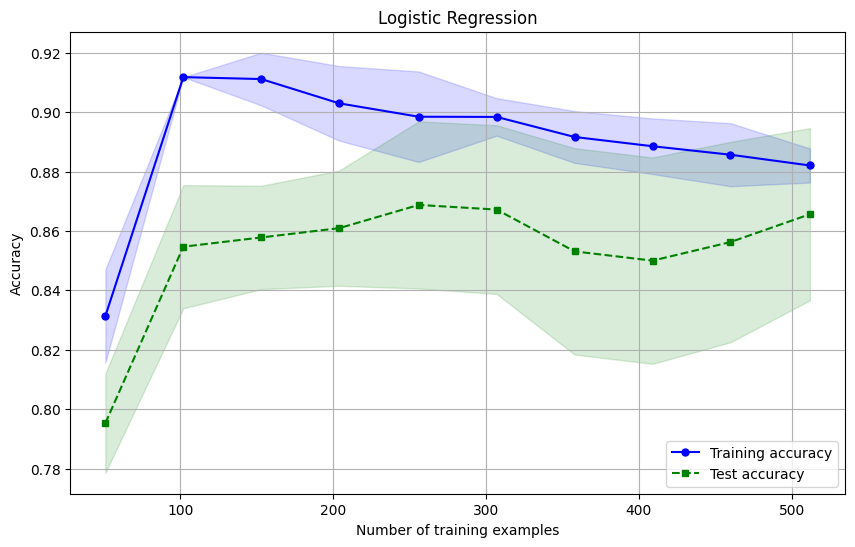

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
params = {'C': 0.3, 'penalty': 'l1', 'solver': 'liblinear'}
clf = LogisticRegression(**params)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')  # Adjust scoring as needed

# Calculate mean and standard deviation
mean_score = np.mean(cv_scores)
std_score = np.std(cv_scores)

# Calculate confidence interval
num_folds = len(cv_scores)
confidence_level = 0.95  # Adjust as needed
z_score = 1.96  # For a 95% confidence interval
margin_of_error = z_score * (std_score / np.sqrt(num_folds))
lower_bound = mean_score - margin_of_error
upper_bound = mean_score + margin_of_error

print(f"Mean: {mean_score:.3f}")
print(f"Standard Deviation: {std_score:.3f}")
print(f"Confidence Interval ({confidence_level * 100}%): ({lower_bound:.3f}, {upper_bound:.3f})")
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation for training scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Test accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.title('Logistic Regression')
plt.show()

Mean: 0.830
Standard Deviation: 0.022
Confidence Interval (95.0%): (0.810, 0.849)


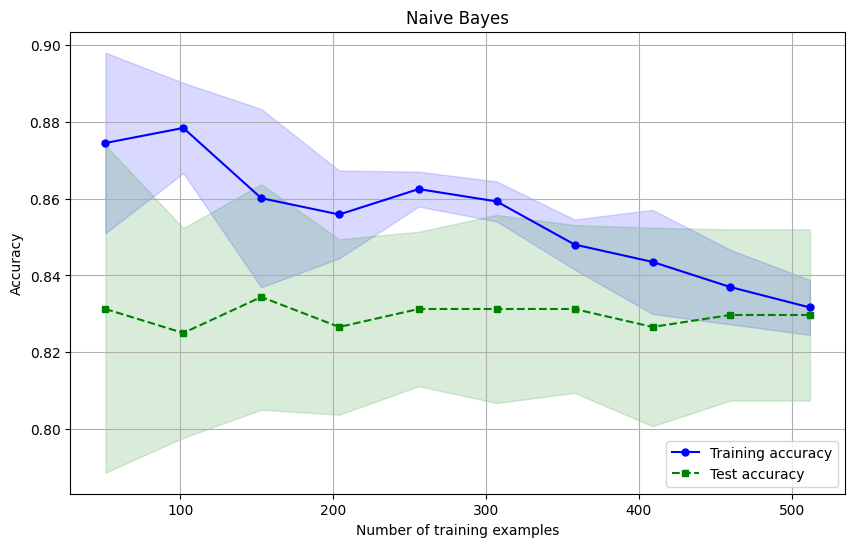

In [ ]:
from sklearn.model_selection import cross_val_score, learning_curve
params = {'C': 0.3, 'penalty': 'l1', 'solver': 'liblinear'}
clf = GaussianNB()
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')  # Adjust scoring as needed

# Calculate mean and standard deviation
mean_score = np.mean(cv_scores)
std_score = np.std(cv_scores)

# Calculate confidence interval
num_folds = len(cv_scores)
confidence_level = 0.95  # Adjust as needed
z_score = 1.96  # For a 95% confidence interval
margin_of_error = z_score * (std_score / np.sqrt(num_folds))
lower_bound = mean_score - margin_of_error
upper_bound = mean_score + margin_of_error

print(f"Mean: {mean_score:.3f}")
print(f"Standard Deviation: {std_score:.3f}")
print(f"Confidence Interval ({confidence_level * 100}%): ({lower_bound:.3f}, {upper_bound:.3f})")
# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation for training scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Test accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.title('Naive Bayes')
plt.show()

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
from pycaret.classification import *
pcrt = setup(data=X_train,target=y_train,session_id=42, verbose=True,imputation_type=None,memory=False,feature_selection=False )
compare_models(verbose=True)

,Description,Value
0,Session id,42
1,Target,Class/ASD
2,Target type,Binary
3,Original data shape,"(640, 18)"
4,Transformed data shape,"(640, 18)"
5,Transformed train set shape,"(448, 18)"
6,Transformed test set shape,"(192, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,None


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8797,0.9312,0.6500,0.7281,0.6818,0.6082,0.6129,0.9380
ridge,Ridge Classifier,0.8797,0.9244,0.6486,0.7309,0.6791,0.6058,0.6124,0.0620
qda,Quadratic Discriminant Analysis,0.8796,0.8940,0.7292,0.6991,0.7041,0.6296,0.6368,0.0310
lda,Linear Discriminant Analysis,0.8709,0.9241,0.7306,0.6683,0.6938,0.6127,0.6168,0.0320
rf,Random Forest Classifier,0.8618,0.9051,0.5681,0.7017,0.6201,0.5370,0.5461,0.2820
gbc,Gradient Boosting Classifier,0.8596,0.9074,0.5903,0.7061,0.6232,0.5397,0.5550,0.1850
et,Extra Trees Classifier,0.8550,0.9081,0.5681,0.6852,0.6059,0.5192,0.5312,0.1790
lightgbm,Light Gradient Boosting Machine,0.8530,0.9012,0.5681,0.6924,0.6085,0.5200,0.5335,0.5260
xgboost,Extreme Gradient Boosting,0.8508,0.8889,0.5792,0.6914,0.6085,0.5189,0.5347,0.0890
ada,Ada Boost Classifier,0.8482,0.8737,0.5736,0.6449,0.5815,0.4929,0.5089,0.1410


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)